### **Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

First, we should call data sets from splitting section.

In [2]:
%store -r X_train
X_train = X_train

%store -r y_train
y_train = y_train

%store -r X_val
X_val = X_val

%store -r y_val
y_val = y_val

%store -r X_test
X_test = X_test

%store -r y_test
y_test = y_test

In the next sections, based on each model, we define specific pipleline and build and train model.

In [3]:
def evaluate_model(X_train, y_train, X_val, y_val, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

    print(f"Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f"Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
    print(f"Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

### **Model Training**

##### **Linear Regression**

In [4]:
model = Pipeline([
    ("scaler", StandardScaler()), # This algorithm needs scaling
    ("lin_reg", LinearRegression())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9991, Training CV RMSE: 95.2011
Training R²: 0.9991, Training RMSE: 95.8568
Validation R²: 0.9996, Validation RMSE: 63.3000


The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

##### **Decision Tree Regressor**

In [5]:
model = Pipeline([
    ("DecisionTree_reg", DecisionTreeRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.8919, Training CV RMSE: 1033.1344
Training R²: 1.0000, Training RMSE: 0.0000
Validation R²: 0.8972, Validation RMSE: 996.5412


This model is overfit (CV train and train have gap). But, since the gap between CV train and validation is small, that overfitting is not severe.

##### **Random Forest Regressor**

In [6]:
model = Pipeline([
    ("RandomForest_reg", RandomForestRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9601, Training CV RMSE: 627.6473
Training R²: 0.9950, Training RMSE: 222.0502
Validation R²: 0.9633, Validation RMSE: 595.1036


The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

##### **Support Vector Regression**

In [7]:
model = Pipeline([
    ("scaler", StandardScaler()), # Scaling the features
    ("svr", SVR(kernel='rbf')) 
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.0685, Training CV RMSE: 3027.3353
Training R²: 0.0862, Training RMSE: 2999.4412
Validation R²: 0.0855, Validation RMSE: 2971.9019


The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

##### **XGBoost Regressor**

In [8]:
model = Pipeline([
    ("scaler", StandardScaler()),  # Scaling the features
    ("xgb", XGBRegressor(objective='reg:squarederror'))  
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9920, Training CV RMSE: 280.2197
Training R²: 0.9986, Training RMSE: 116.9903
Validation R²: 0.9928, Validation RMSE: 264.4133


The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

##### **CatBoost Regression**

In [9]:
model = Pipeline([
    ("catboost", CatBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 133ms	remaining: 2m 13s
1:	learn: 2890.4135878	total: 135ms	remaining: 1m 7s
2:	learn: 2774.6653173	total: 137ms	remaining: 45.4s
3:	learn: 2665.5842386	total: 138ms	remaining: 34.3s
4:	learn: 2567.5958915	total: 139ms	remaining: 27.7s
5:	learn: 2469.5098712	total: 140ms	remaining: 23.3s
6:	learn: 2376.9738903	total: 142ms	remaining: 20.1s
7:	learn: 2297.0043203	total: 143ms	remaining: 17.7s
8:	learn: 2215.1927629	total: 144ms	remaining: 15.9s
9:	learn: 2139.8163751	total: 146ms	remaining: 14.4s
10:	learn: 2063.5877621	total: 147ms	remaining: 13.2s
11:	learn: 1992.1604502	total: 148ms	remaining: 12.2s
12:	learn: 1923.5305228	total: 149ms	remaining: 11.3s
13:	learn: 1858.1751387	total: 150ms	remaining: 10.6s
14:	learn: 1799.7401392	total: 152ms	remaining: 9.97s
15:	learn: 1743.3864607	total: 153ms	remaining: 9.41s
16:	learn: 1686.5267358	total: 154ms	remaining: 8.93s
17:	learn: 1628.8700788	total: 156ms	remaining: 8.49s
18:	lea

The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

##### **AdaBoost Regression**

In [23]:
model = Pipeline([
    ("adaboost", AdaBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.8850, Training CV RMSE: 1057.1536
Training R²: 0.8937, Training RMSE: 1023.0268
Validation R²: 0.8850, Validation RMSE: 1053.7741


The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

### **Model Selection**

Based on the result of default model training, the best model is `CatBoost` with R2 0.9997 and RMSE $50.

In [10]:
best_model = CatBoostRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print(f"Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 1.66ms	remaining: 1.65s
1:	learn: 2890.4135878	total: 3.11ms	remaining: 1.55s
2:	learn: 2774.6653173	total: 4.44ms	remaining: 1.48s
3:	learn: 2665.5842386	total: 5.71ms	remaining: 1.42s
4:	learn: 2567.5958915	total: 7.04ms	remaining: 1.4s
5:	learn: 2469.5098712	total: 8.32ms	remaining: 1.38s
6:	learn: 2376.9738903	total: 9.47ms	remaining: 1.34s
7:	learn: 2297.0043203	total: 10.7ms	remaining: 1.33s
8:	learn: 2215.1927629	total: 11.8ms	remaining: 1.3s
9:	learn: 2139.8163751	total: 12.9ms	remaining: 1.27s
10:	learn: 2063.5877621	total: 14.1ms	remaining: 1.27s
11:	learn: 1992.1604502	total: 15.4ms	remaining: 1.26s
12:	learn: 1923.5305228	total: 16.5ms	remaining: 1.25s
13:	learn: 1858.1751387	total: 17.5ms	remaining: 1.24s
14:	learn: 1799.7401392	total: 18.6ms	remaining: 1.22s
15:	learn: 1743.3864607	total: 19.7ms	remaining: 1.21s
16:	learn: 1686.5267358	total: 20.8ms	remaining: 1.2s
17:	learn: 1628.8700788	total: 21.9ms	remaining:

### **Tune Model with Hyper-Parameter**

Now, in this section, we try to tune model and improve its peformance.

In [12]:
param_grid = {
    'iterations': [100, 200],  # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],  # Step size at each iteration
    'depth': [4, 6, 8],  # Depth of the trees
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization coefficient
    'border_count': [32, 64],  # Number of splits in categorical features
}

grid_search = GridSearchCV(estimator=best_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_root_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0:	learn: 2891.2346180	total: 1.88ms	remaining: 375ms
1:	learn: 2668.8933077	total: 3.62ms	remaining: 358ms
2:	learn: 2459.9756447	total: 5.45ms	remaining: 358ms
3:	learn: 2268.0262502	total: 7.38ms	remaining: 362ms
4:	learn: 2101.5786230	total: 9.13ms	remaining: 356ms
5:	learn: 1943.3093160	total: 10.8ms	remaining: 349ms
6:	learn: 1792.1020532	total: 12.5ms	remaining: 345ms
7:	learn: 1653.1111994	total: 14.3ms	remaining: 344ms
8:	learn: 1527.1311250	total: 16.1ms	remaining: 342ms
9:	learn: 1428.5181867	total: 18.1ms	remaining: 344ms
10:	learn: 1325.7906953	total: 20ms	remaining: 343ms
11:	learn: 1225.5528466	total: 21.9ms	remaining: 343ms
12:	learn: 1145.1798397	total: 23.7ms	remaining: 341ms
13:	learn: 1070.7260044	total: 25.4ms	remaining: 338ms
14:	learn: 998.3574971	total: 27.2ms	remaining: 336ms
15:	learn: 936.2662415	total: 29.1ms	remaining: 335ms
16:	learn: 872.7640039	total: 30.9ms	remaining: 332ms
17:	learn: 823.00

In [13]:
best_model_tuned = grid_search.best_estimator_

In [14]:
best_model_tuned = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print(f"Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model_tuned.fit(X_train, y_train)
y_train_pred = best_model_tuned.predict(X_train)
y_val_pred = best_model_tuned.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

0:	learn: 2888.9038597	total: 1.91ms	remaining: 381ms
1:	learn: 2666.6848766	total: 3.83ms	remaining: 379ms
2:	learn: 2457.7945036	total: 5.39ms	remaining: 354ms
3:	learn: 2264.0649998	total: 6.94ms	remaining: 340ms
4:	learn: 2107.1511769	total: 8.31ms	remaining: 324ms
5:	learn: 1947.7858787	total: 9.57ms	remaining: 309ms
6:	learn: 1803.5933289	total: 10.8ms	remaining: 298ms
7:	learn: 1673.0132176	total: 12ms	remaining: 288ms
8:	learn: 1547.1883950	total: 13.2ms	remaining: 281ms
9:	learn: 1451.4864379	total: 14.5ms	remaining: 276ms
10:	learn: 1341.2997862	total: 15.8ms	remaining: 271ms
11:	learn: 1249.0347090	total: 17ms	remaining: 266ms
12:	learn: 1168.6492901	total: 18.2ms	remaining: 262ms
13:	learn: 1084.4820003	total: 19.4ms	remaining: 258ms
14:	learn: 1011.2906088	total: 20.6ms	remaining: 254ms
15:	learn: 937.0832152	total: 21.9ms	remaining: 252ms
16:	learn: 873.2688874	total: 23.4ms	remaining: 252ms
17:	learn: 818.7546156	total: 24.8ms	remaining: 250ms
18:	learn: 763.6390680	tota

Since, the tuned model is not better than default parameter, we conside default model as the final model.

In [15]:
final_model = best_model

### **Final Evaluation of Model**

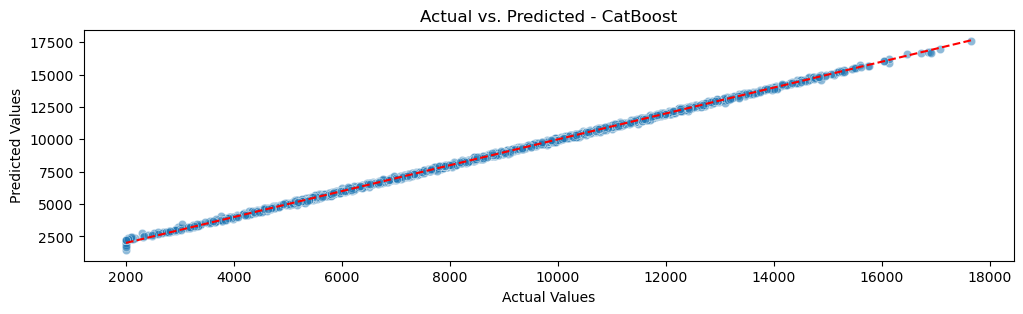

In [16]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize = (12,3))

sns.scatterplot(x = y_val,
                y = y_val_pred,
                alpha = 0.5)

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted - CatBoost")
plt.show()

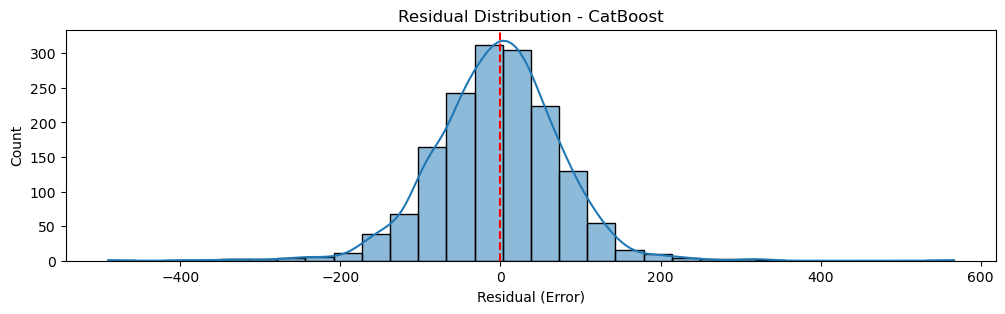

In [17]:
# Residual Plot (Errors)
residuals = y_val - y_val_pred

plt.figure(figsize = (12,3))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution - CatBoost")
plt.show()

### **Apply Model on Test Data**

Here, that we are happy with model of the project, we can predict the price on test data. But, before prediction, we need to encode categorical variables (since during preprocessing we did)

In [22]:
with open('../../models/Brand_Encoder.pkl', 'rb') as f:
    brand_encoder = pickle.load(f) #Brand
    
with open('../../models/Model_Encoder.pkl', 'rb') as f:
    model_encoder = pickle.load(f) #Model
    
with open('../../models/OneHot_Encoder.pkl', 'rb') as f:
    onehot_encoder = pickle.load(f) #Fuel , Transmission

In the next step, we should encode categorical features.

In [ ]:
# Encoding Brand and Model
X_test['Encoded_Brand'] = X_test['Brand'].map(brand_encoder)
X_test['Encoded_Model'] = X_test['Model'].map(model_encoder)
X_test['Encoded_Brand'].fillna(X_test['Encoded_Brand'].mean(), inplace=True)
X_test['Encoded_Model'].fillna(X_test['Encoded_Model'].mean(), inplace=True)
X_test.drop(['Brand', 'Model'], axis=1, inplace=True)

# Encoding Fuel and Transmission
categorical_cols = ['Fuel', 'Transmission']
encoded_array_test = onehot_encoder.transform(X_test[categorical_cols])
encoded_df_test = pd.DataFrame(encoded_array_test, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Merge encoded columns with test data
X_test_encoded = X_test.drop(columns=categorical_cols).reset_index(drop=True)
X_test = pd.concat([X_test_encoded, encoded_df_test], axis=1)

Now, we can predict test data.

In [36]:
y_test_pred = final_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R²: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}")

Test R²: 0.9997, Test RMSE: 48.9446


The result shows model is good generalized and there is no overfitting/underfitting.

### **CHECKPOINT**

In [ ]:
pickle.dump(final_model, open('../../models/Model.pkl', 'wb'))